In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# calculate Euclidean distance
def euclDistance(vector1, vector2):
    return np.sqrt(np.sum(np.power(vector2 - vector1, 2)))#sqrt( (x1-x2)^2+(y1-y2)^2 )

In [3]:
# init centroids with random samples
def initCentroids(dataSet, k):
    numSamples, dim = dataSet.shape
    centroids = np.zeros((k, dim))
    for i in range(k):
        index = int(np.random.uniform(0, numSamples))
        centroids[i, :] = dataSet[index, :]
    return centroids

In [4]:
# k-means cluster
def kmeans(dataSet, k):
    numSamples = dataSet.shape[0]
    # first column stores which cluster this sample belongs to,
    # second column stores the error between this sample and its centroid
    clusterAssment = np.mat(np.zeros((numSamples, 2)))
    clusterChanged = True

    ## step 1: init centroids
    centroids = initCentroids(dataSet, k)

    while clusterChanged:
        clusterChanged = False
        ## for each sample
        for i in range(numSamples):
            minDist = 100000.0
            minIndex = 0
            ## for each centroid
            ## step 2: find the centroid who is closest
            for j in range(k):
                distance = euclDistance(centroids[j, :], dataSet[i, :])
                if distance < minDist:
                    minDist = distance
                    minIndex = j

            ## step 3: update its cluster
            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True
                clusterAssment[i, :] = minIndex, minDist ** 2

        ## step 4: update centroids
        for j in range(k):
            pointsInCluster = dataSet[np.nonzero(clusterAssment[:, 0].A == j)[0]]
            centroids[j, :] = np.mean(pointsInCluster, axis=0)

    print('Congratulations, cluster complete!')
    return centroids, clusterAssment

In [5]:
# show your cluster only available with 2-D data
def showCluster(dataSet, k, centroids, clusterAssment):
    numSamples, dim = dataSet.shape
    if dim != 2:
        print("Sorry! I can not draw because the dimension of your data is not 2!")
        return 1

    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
    if k > len(mark):
        print("Sorry! Your k is too large! please contact Zouxy")
        return 1

    # draw all samples
    for i in range(numSamples):
        markIndex = int(clusterAssment[i, 0])
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])

    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']
    # draw the centroids
    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize=12)

    plt.show()

step 1: load data...
step 2: clustering...
Congratulations, cluster complete!
step 3: show the result...


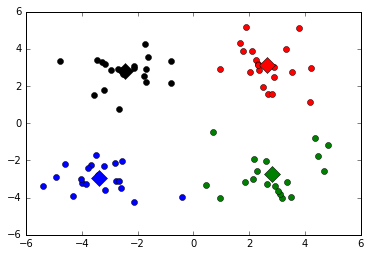

In [6]:
## step 1: load data
print("step 1: load data...")
dataSet = []
fileIn = open('testSet.txt')
for line in fileIn.readlines():
    lineArr = line.strip().split('\t')
    dataSet.append([float(lineArr[0]), float(lineArr[1])])

## step 2: clustering...
print("step 2: clustering...")
dataSet = np.mat(dataSet)
k = 4
centroids, clusterAssment = kmeans(dataSet, k)

## step 3: show the result
print("step 3: show the result...")
showCluster(dataSet, k, centroids, clusterAssment)